<a href="https://colab.research.google.com/github/gnitnaw/Programs/blob/master/Chapter8/TreeDepthCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version

Python 3.7.12


# Example 8.2
## Import modules

In [2]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import zero_one_loss
import matplotlib.pyplot as plt
print(np.__version__)

1.21.5


## Set random seed

In [3]:
np.random.seed(1357)

## Original Program

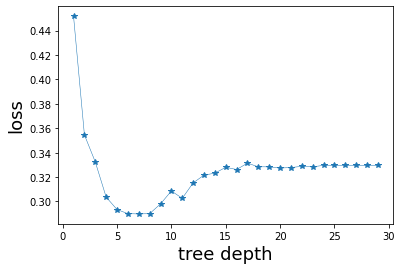

In [4]:
def ZeroOneScore(clf, X, y):
    y_pred = clf.predict(X)
    return zero_one_loss(y, y_pred)


# Construct the training set 
X, y =  make_blobs(n_samples=5000, n_features=10, centers=3,
                           random_state=10, cluster_std=10)
    
# construct a decision tree classifier  
clf = DecisionTreeClassifier(random_state=0)

# cross validation loss as a function of tree depth (1 to 30)
xdepthlist = []
cvlist = []
tree_depth = range(1,30)
for d in tree_depth:
    xdepthlist.append(d)
    clf.max_depth=d
    cv = np.mean(cross_val_score(clf, X, y, cv=10, scoring=ZeroOneScore))
    cvlist.append(cv)
    
plt.xlabel('tree depth', fontsize=18, color='black')
plt.ylabel('loss', fontsize=18, color='black')
plt.plot(xdepthlist, cvlist,'-*' , linewidth=0.5)